In [2]:
# coding=utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import apt_valuation as apt

In [95]:
offers_excel = pd.read_excel("database/scraped_data_rental.xlsx")
offers_clean = apt.get_clean_values(offers_excel)

diff_cols = offers_excel.columns.difference(offers_clean.columns)
offers = pd.merge(offers_excel[diff_cols], offers_clean, left_index=True, right_index=True, how="inner")

offers["Price per sqm"] = offers["Price"] / offers["Surface"]

num_vars = ["Surface", "Monthly charges","Floor","Construction year","Number of rooms","Price per sqm","Building type","Property condition"]
predicted = ["Price"]

offers2 = offers.loc[:,num_vars + predicted].dropna()

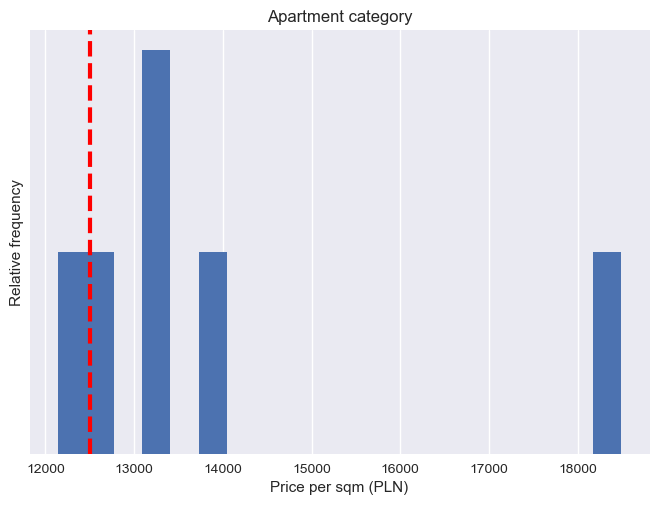

In [98]:
# https://towardsdatascience.com/take-your-histograms-to-the-next-level-using-matplotlib-5f093ad7b9d3

plt.style.use("seaborn")

valuation_sqm = 12500

fig, ax1 = plt.subplots()
apt_hist = ax1.hist(np.clip(offers2.loc[offers2['Property condition']=='do wykończenia',"Price per sqm"],5000,25000),density=True,bins=20)
ax1.title.set_text("Apartment category")
ax1.set_xlabel("Price per sqm (PLN)")
ax1.set_yticks([])
ax1.set_ylabel("Relative frequency")
ax1.axvline(valuation_sqm,ymax=1,color="r",linewidth=3,linestyle="--")

fig.savefig(fname="static/img/hist_building_type.png")
